In [2]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [3]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [1]:
# Male, Female, 50-100, WHITE

In [4]:
gender = "MF"
age_b = 70
age_a = 80
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [5]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [6]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [7]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [8]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [9]:
# med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [10]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE


In [11]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [12]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_27969/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [13]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

ValueError: Expected a 1D array, got an array with shape (0, 63)

In [ ]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
261,23,2082-07-17,M,NaN,0,226364,124321,234044.0,2157-10-21 12:15:00,2157-10-21 12:16:00,...,OR Crystalloid Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 16:42:00,75.0,OR Crystalloid Intake
262,23,2082-07-17,M,NaN,0,225158,124321,234044.0,2157-10-21 12:15:00,2157-10-21 13:22:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 17:48:00,75.0,NaCl 0.9%
263,23,2082-07-17,M,NaN,0,222051,124321,234044.0,2157-10-21 12:15:00,2157-10-21 13:22:00,...,Nitroprusside,metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 17:48:00,75.0,Nitroprusside
264,23,2082-07-17,M,NaN,0,220949,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 19:27:00,75.0,Dextrose 5%
265,23,2082-07-17,M,NaN,0,225879,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Levofloxacin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,2 days 19:27:00,75.0,Levofloxacin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322661,44052,2114-04-03,M,NaN,0,226452,162646,292683.0,2187-12-14 08:00:00,2187-12-14 08:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 00:46:00,74.0,PO Intake
322662,44052,2114-04-03,M,NaN,0,227694,162646,292683.0,2187-12-14 21:32:00,2187-12-14 21:33:00,...,Omeprazole (Prilosec),metavision,inputevents_mv,Medications,dose,Solution,NaN,1 days 14:18:00,74.0,Omeprazole
322663,44052,2114-04-03,M,NaN,0,225974,162646,292683.0,2187-12-14 22:33:00,2187-12-14 22:34:00,...,Metoprolol,metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 15:19:00,74.0,Metoprolol
322664,44052,2114-04-03,M,NaN,0,221794,162646,292683.0,2187-12-15 09:17:00,2187-12-15 09:18:00,...,Furosemide (Lasix),metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 02:03:00,74.0,Furosemide


### Med 2

In [12]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_54767/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [13]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [14]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [15]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [16]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [17]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
187,23,2082-07-17,M,NaN,0,222051,124321,234044.0,2157-10-21 13:22:00,2157-10-21 14:02:00,...,Nitroprusside,Nitroprusside,metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 18:28:00,75.0
188,23,2082-07-17,M,NaN,0,225158,124321,234044.0,2157-10-21 13:22:00,2157-10-21 14:02:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 18:28:00,75.0
189,23,2082-07-17,M,NaN,0,220949,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 19:27:00,75.0
190,23,2082-07-17,M,NaN,0,222042,124321,234044.0,2157-10-21 17:56:00,2157-10-21 21:15:00,...,Nicardipine,Nicardipine,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 01:41:00,75.0
191,23,2082-07-17,M,NaN,0,226452,124321,234044.0,2157-10-22 00:00:00,2157-10-22 00:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 04:27:00,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237353,44052,2114-04-03,M,NaN,0,225154,162646,292683.0,2187-12-13 17:04:00,2187-12-13 17:05:00,...,Morphine Sulfate,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 09:50:00,74.0
237354,44052,2114-04-03,M,NaN,0,222042,162646,292683.0,2187-12-13 17:18:00,2187-12-13 17:43:00,...,Nicardipine,Nicardipine,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 10:28:00,74.0
237355,44052,2114-04-03,M,NaN,0,221456,162646,292683.0,2187-12-13 21:00:00,2187-12-13 22:00:00,...,Calcium Gluconate,Calcium Gluconate,metavision,inputevents_mv,Medications,grams,Solution,NaN,0 days 14:45:00,74.0
237356,44052,2114-04-03,M,NaN,0,226452,162646,292683.0,2187-12-14 09:00:00,2187-12-14 09:01:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 01:46:00,74.0


In [22]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [23]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
187,23,2082-07-17,M,NaN,0,222051,124321,234044.0,2157-10-21 13:22:00,2157-10-21 14:02:00,...,Nitroprusside,metavision,inputevents_mv,Medications,mg,Solution,NaN,2 days 18:28:00,75.0,Nitroprusside
188,23,2082-07-17,M,NaN,0,225158,124321,234044.0,2157-10-21 13:22:00,2157-10-21 14:02:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 18:28:00,75.0,NaCl 0.9%
189,23,2082-07-17,M,NaN,0,220949,124321,234044.0,2157-10-21 15:00:00,2157-10-21 15:01:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,2 days 19:27:00,75.0,Dextrose 5%
190,23,2082-07-17,M,NaN,0,222042,124321,234044.0,2157-10-21 17:56:00,2157-10-21 21:15:00,...,Nicardipine,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 01:41:00,75.0,Nicardipine
191,23,2082-07-17,M,NaN,0,226452,124321,234044.0,2157-10-22 00:00:00,2157-10-22 00:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 04:27:00,75.0,PO Intake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237353,44052,2114-04-03,M,NaN,0,225154,162646,292683.0,2187-12-13 17:04:00,2187-12-13 17:05:00,...,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 09:50:00,74.0,Morphine Sulfate
237354,44052,2114-04-03,M,NaN,0,222042,162646,292683.0,2187-12-13 17:18:00,2187-12-13 17:43:00,...,Nicardipine,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 10:28:00,74.0,Nicardipine
237355,44052,2114-04-03,M,NaN,0,221456,162646,292683.0,2187-12-13 21:00:00,2187-12-13 22:00:00,...,Calcium Gluconate,metavision,inputevents_mv,Medications,grams,Solution,NaN,0 days 14:45:00,74.0,Calcium Gluconate
237356,44052,2114-04-03,M,NaN,0,226452,162646,292683.0,2187-12-14 09:00:00,2187-12-14 09:01:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,1 days 01:46:00,74.0,PO Intake


## Filter Labs

In [306]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract_1.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

Text(0.5, 1.0, 'Distribution of age')

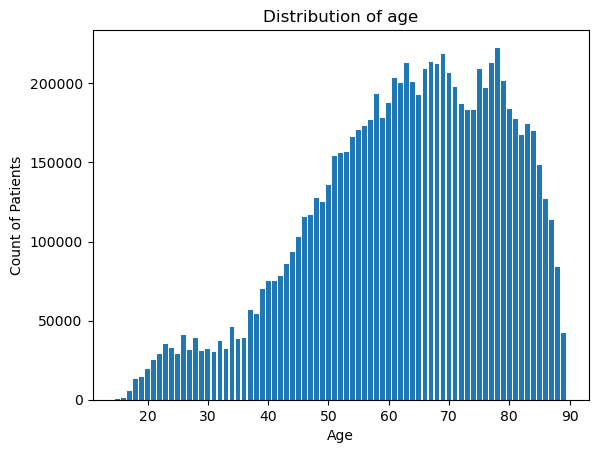

In [307]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [308]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,0.5,Bilirubin,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50885,ENGL,DIVORCED,PROTESTANT QUAKER,58526,0.5,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,2.7,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50912,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.7,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,4.9,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50971,ENGL,DIVORCED,PROTESTANT QUAKER,58526,4.9,mEq/L
3,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,10.0,Alanine aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50861,ENGL,DIVORCED,PROTESTANT QUAKER,58526,10.0,IU/L
4,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,13.0,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,51222,ENGL,DIVORCED,PROTESTANT QUAKER,58526,13.0,g/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874115,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
8874116,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
8874117,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
8874118,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [309]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [310]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [311]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [312]:
labs.shape

(314435, 31)

Text(0.5, 1.0, 'Distribution of age')

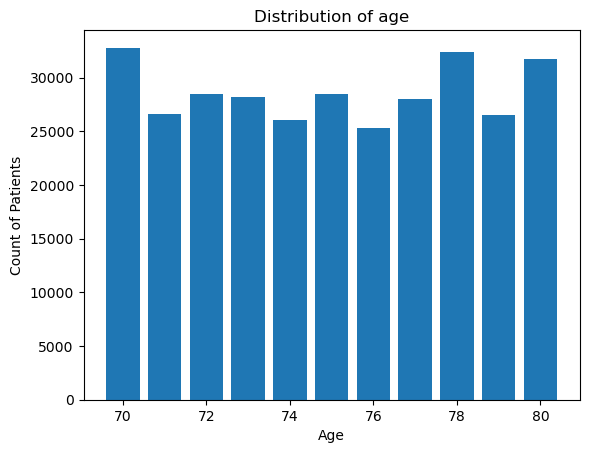

In [313]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [314]:
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))

In [315]:
final_itemids_list = list(final_mapping_lab_itemids.keys())

## Pairs

In [316]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,1425
Dextrose 5%,1309
PO Intake,1201
Solution,1011
Insulin - Regular,849
...,...
Ranitidine,1
Replete (1/2),1
Replete (2/3),1


In [317]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [318]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
11445,100099.0,2118-05-07 00:43:00,2118-05-07 02:00:00,229.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,1,0,Private,225664,ENGL,MARRIED,NOT SPECIFIED,82091,229.0,NaN
11446,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,1.9,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,1,0,Private,50912,ENGL,MARRIED,NOT SPECIFIED,82091,1.9,mg/dL
11447,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,2.6,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,1,0,Private,50960,ENGL,MARRIED,NOT SPECIFIED,82091,2.6,mg/dL
11448,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,4.9,Prothrombin time INR,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,1,0,Private,51237,ENGL,MARRIED,NOT SPECIFIED,82091,4.9,NaN
11449,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,6.4,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,1,0,Private,50971,ENGL,MARRIED,NOT SPECIFIED,82091,6.4,mEq/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871529,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,4.3,Potassium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,1,0,Medicare,50971,ENGL,MARRIED,CATHOLIC,81561,4.3,mEq/L
8871530,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,8.6,Hemoglobin,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,1,0,Medicare,51222,ENGL,MARRIED,CATHOLIC,81561,8.6,g/dL
8871531,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,81.0,Glucose,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,1,0,Medicare,50931,ENGL,MARRIED,CATHOLIC,81561,81.0,mg/dL
8871532,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,142.0,Sodium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,1,0,Medicare,50983,ENGL,MARRIED,CATHOLIC,81561,142.0,mEq/L


In [319]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [320]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [321]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
11445,100099.0,2118-05-07 00:43:00,2118-05-07 02:00:00,229.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,Private,225664,ENGL,MARRIED,NOT SPECIFIED,82091,229.0,NaN,0 days 01:17:00,1.283333
11446,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,1.9,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,Private,50912,ENGL,MARRIED,NOT SPECIFIED,82091,1.9,mg/dL,0 days 01:37:00,1.616667
11447,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,2.6,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,Private,50960,ENGL,MARRIED,NOT SPECIFIED,82091,2.6,mg/dL,0 days 01:37:00,1.616667
11448,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,4.9,Prothrombin time INR,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,Private,51237,ENGL,MARRIED,NOT SPECIFIED,82091,4.9,NaN,0 days 01:37:00,1.616667
11449,100099.0,2118-05-07 00:43:00,2118-05-07 02:20:00,6.4,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,71.0,NaN,ANEMIA,...,Private,50971,ENGL,MARRIED,NOT SPECIFIED,82091,6.4,mEq/L,0 days 01:37:00,1.616667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871529,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,4.3,Potassium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,Medicare,50971,ENGL,MARRIED,CATHOLIC,81561,4.3,mEq/L,12 days 21:55:00,309.916667
8871530,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,8.6,Hemoglobin,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,Medicare,51222,ENGL,MARRIED,CATHOLIC,81561,8.6,g/dL,12 days 21:55:00,309.916667
8871531,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,81.0,Glucose,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,Medicare,50931,ENGL,MARRIED,CATHOLIC,81561,81.0,mg/dL,12 days 21:55:00,309.916667
8871532,199972.0,2186-08-29 07:15:00,2186-09-11 05:10:00,142.0,Sodium,PHYS REFERRAL/NORMAL DELI,ELECTIVE,78.0,NaN,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,...,Medicare,50983,ENGL,MARRIED,CATHOLIC,81561,142.0,mEq/L,12 days 21:55:00,309.916667


In [322]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Glucose', 'Creatinine', 'Magnesium', 'Prothrombin time INR',
       'Potassium', 'Calcium', 'PTT', 'Sodium', 'Potassium serum',
       'Hemoglobin', 'Platelets', 'Bilirubin', 'Alanine aminotransferase',
       'Asparate aminotransferase', 'Glucose urine', 'Lactic acid',
       'Amylase', 'Vitamin B12', 'Lipase', 'Hemoglobin percent',
       'Calcium ionized', 'Sodium, Urine', 'Creatinine urine',
       'Potassium, Urine', 'Amylase, Ascites', 'Glucose, Pleural',
       'Glucose, CSF', 'Glucose, Ascites', 'Uric Acid', 'Calcium urine',
       'Uric Acid, Urine', 'Bilirubin, Total, Ascites',
       'Bilirubin, Total, Body Fluid', 'Amylase, Pleural',
       'Amylase, Body Fluid', 'Glucose, Body Fluid', 'Glucose, Urine',
       'Creatinine pleural', 'Magnesium, Urine', 'Prolactin',
       'Creatinine ascites', 'Sodium, Body Fluid',
       'Potassium, Body Fluid', 'Lipase, Ascites', 'Hemoglobin C',
       'Hemoglobin F', 'Hemoglobin A2', 'Creatinine body fluid',
       'Bilirubin, Tot

In [289]:
# mimic_extract_map = pd.read_csv(os.path.join("/Users/yanpavan/Desktop/", "itemid_to_variable_map.csv"))
# mimic_extract_map_small = mimic_extract_map[["LEVEL2", "MIMIC LABEL", "ITEMID"]]
# lab_names = [k.lower() for k in d_m_l_doc.groupby("lab result").count()[["Medication"]].reset_index()["lab result"].to_list()]
# res_dict = {}
# for l in lab_names:
#     res_dict[l.lower().strip()] = mimic_extract_map_small[mimic_extract_map_small.apply(lambda r: l.lower() in str(r["MIMIC LABEL"]).lower(), axis=1)].dropna()
# lab_itemids, lab_labels = {}, {}
# for l in res_dict:
#     if res_dict[l].shape[0]>0:
#         lab_labels[l] = res_dict[l].groupby("LEVEL2")["MIMIC LABEL"].apply(list).to_dict()
#         lab_itemids[l] = res_dict[l].groupby("LEVEL2")["ITEMID"].apply(list).to_dict()   
# del lab_itemids['ast']['Diastolic blood pressure']     
# import pickle
# v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
# temp_itemids_list = {k: [i for l in list(v.values()) for i in l] for k, v in lab_itemids.items()}
# for l in v_r_lab_dict:
#     if l.lower().strip() in temp_itemids_list:
#         items = [k[1] for k in v_r_lab_dict[l]]
#         names = [k[0] for k in v_r_lab_dict[l]]
#         diff = list(set(items).difference(set(temp_itemids_list[l.lower().strip()])))
#         if len(diff)>0:
#             for k in diff:
#                lab_itemids[l.lower().strip()][names[items.index(k)]] = [k]
#     else:
#         for l1 in v_r_lab_dict[l]:
#             if l1[0] not in lab_itemids:
#                 lab_itemids[l1[0]] = {}
#                 lab_itemids[l1[0]][l1[0]] = [l1[1]]


In [ ]:
d_m_l_doc["lab result"].value_counts()

potassium      4
B12            4
sodium         3
glucose        2
ALT            2
platelets      2
prolactin      2
INR            2
Lipase         1
Amylase        1
bilirubin      1
CPK            1
creatinine     1
Aptt           1
magnesium      1
Hemoglobin     1
AST            1
lactic acid    1
Uric acid      1
calcium        1
ANA            1
Name: lab result, dtype: int64

In [323]:
t_lab_itemids = {'ALT': {'Alanine aminotransferase': [50861, 769, 220644]},
 'ANA': {'Fraction inspired oxygen': [189]},
 'AST': {'Asparate aminotransferase': [50878, 770, 220587]},
 'Hemoglobin': {'Hemoglobin percent': [50852],
  'Hemoglobin C': [51224],
  'Hemoglobin F': [51225],
  'Hemoglobin A2': [51223],
  'Hemoglobin': [814, 220228, 51222, 50811]},
 'INR': {'Prothrombin time INR': [51237, 815, 1530, 227467]},
 'bilirubin': {'Bilirubin': [51465,
   50883,
   803,
   225651,
   50885,
   1538,
   848,
   225690,
   50884],
  'Bilirubin, Total, Pleural': [51049],
  'Bilirubin, Total, Body Fluid': [51028],
  'Bilirubin, Total, Ascites': [50838]},
 'calcium': {'Calcium': [786, 1522, 3746, 51029, 50893, 225625],
  'Calcium ionized': [50808, 816, 225667, 3766],
  'Calcium urine': [51066, 51077]},
 'creatinine': {'Creatinine': [791, 1525, 220615, 50912],
  'Creatinine ascites': [50841],
  'Creatinine body fluid': [51032],
  'Creatinine pleural': [51052],
  'Creatinine urine': [51082]},
 'glucose': {'Glucose': [50931,
   807,
   811,
   1529,
   50809,
   3745,
   225664,
   220621,
   226537],
  'Glucose urine': [51478],
  'Glucose, CSF': [51014],
  'Estimated Actual Glucose': [51529],
  'Glucose, Urine': [51084],
  'Glucose, Pleural': [51053],
  'Glucose, Joint Fluid': [51022],
  'Glucose, Ascites': [50842],
  'Glucose, Body Fluid': [51034]},
 'lactic acid': {'Lactic acid': [818, 225668, 1531]},
 'magnesium': {'Magnesium': [50960], 'Magnesium, Urine': [51088]},
 'platelets': {'Platelets': [51265, 828, 227457], 'Large Platelets': [51240]},
 'potassium': {'Potassium': [829, 1535, 227464, 50971, 50822],
  'Potassium serum': [227442],
  'Potassium, Body Fluid': [51041],
  'Potassium, Pleural': [51057],
  'Potassium, Stool': [51064],
  'Potassium, Urine': [51097],
  'Potassium, Ascites': [50847]},
 'sodium': {'Sodium': [837, 1536, 220645, 226534, 50983, 50824],
  'Sodium, Ascites': [50848],
  'Sodium, Body Fluid': [51042],
  'Sodium, Pleural': [51058],
  'Sodium, Stool': [51065],
  'Sodium, Urine': [51100]},
 'Uric acid': {'Uric Acid': [51007], 'Uric Acid, Urine': [51105]},
 'B12': {'Vitamin B12': [51010]},
 'prolactin': {'Prolactin': [50973]},
 'Amylase': {'Amylase': [50867], 'Amylase, Ascites': [50836], 'Amylase, Body Fluid': [51026],'Amylase, Joint Fluid': [51020],'Amylase, Pleural': [51047], 'Amylase, Urine': [51072]},
 'Lipase': {'Lipase': [50956], 'Lipase, Ascites': [50844], 'Lipase, Body Fluid': [51036]},
 'Aptt': {'PTT': [825, 1533, 227466, 51275]}}

In [297]:
# lab_itemids

{'alt': {'Alanine aminotransferase': [50861, 769, 220644]},
 'ana': {'Fraction inspired oxygen': [189]},
 'ast': {'Asparate aminotransferase': [50878, 770, 220587]},
 'hemoglobin': {'Hemoglobin percent': [50852],
  'Hemoglobin C': [51224],
  'Hemoglobin F': [51225],
  'Hemoglobin A2': [51223],
  'Hemoglobin': [814, 220228, 51222, 50811]},
 'inr': {'Prothrombin time INR': [51237, 815, 1530, 227467]},
 'bilirubin': {'Bilirubin': [51465,
   50883,
   803,
   225651,
   50885,
   1538,
   848,
   225690,
   50884],
  'Bilirubin, Total, Pleural': [51049],
  'Bilirubin, Total, Body Fluid': [51028],
  'Bilirubin, Total, Ascites': [50838]},
 'calcium': {'Calcium': [786, 1522, 3746, 51029, 50893, 225625],
  'Calcium ionized': [50808, 816, 225667, 3766],
  'Calcium urine': [51066, 51077]},
 'creatinine': {'Creatinine': [791, 1525, 220615, 50912],
  'Creatinine ascites': [50841],
  'Creatinine body fluid': [51032],
  'Creatinine pleural': [51052],
  'Creatinine urine': [51082]},
 'glucose': {'Glu

In [90]:
# orig = ['alt',
#  'ana',
#  'ast',
#  'hemoglobin',
#  'inr',
#  'bilirubin',
#  'calcium',
#  'creatinine',
#  'glucose',
#  'lactic acid',
#  'magnesium',
#  'platelets',
#  'potassium',
#  'sodium']
# dict_lab_mapping = {
#     k:[k] for k in orig
# }


# rest = ['Uric Acid',
#  'Uric Acid, Urine',
#  'Vitamin B12',
#  'Prolactin',
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine',
#  'Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']
# dict_lab_mapping["Uric acid".lower()] = ['Uric Acid', 'Uric Acid, Urine']
# dict_lab_mapping["B12".lower()] = ['Vitamin B12']
# dict_lab_mapping["prolactin".lower()] = ['Prolactin']
# dict_lab_mapping["Amylase".lower()] = [
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine']
 
# dict_lab_mapping["Lipase".lower()] = ['Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']


In [324]:
d_lab_map = {k:list(v.keys()) for k, v in t_lab_itemids.items()}

In [139]:
# d_lab_map = {k.strip():[] for k in d_m_l_doc["lab result"].unique()}
# for i, v in lab_itemids.items():
#     if i.lower() in d_lab_map:
#         d_lab_map[i.lower()].extend(list(v.keys()))
#     elif i.strip() in d_lab_map:
#         d_lab_map[i].extend(list(v.keys()))

# d_lab_map["ALT"].extend(["Alanine aminotransferase"])
# d_lab_map["ANA"].extend(["Fraction inspired oxygen"])
# d_lab_map["AST"].extend(["Asparate aminotransferase"])
# d_lab_map["Hemoglobin"].extend(["Hemoglobin percent", "Hemoglobin C", "Hemoglobin F", "Hemoglobin A2"])
# d_lab_map["Uric acid"].extend(["Uric Acid, Urine", "Uric Acid"])
# d_lab_map["Amylase"].extend(["Amylase, Ascites", "Amylase, Body Fluid", "Amylase, Joint Fluid", "Amylase, Pleural", "Amylase, Urine"])
# d_lab_map["Lipase"].extend(["Lipase, Ascites", "Lipase, Body Fluid"])
# d_lab_map["B12"].extend(["Vitamin B12"])
# d_lab_map["INR"].extend(["Prothrombin time INR"])

In [330]:
d_lab_map["CPK"] = []
d_lab_map

{'ALT': ['Alanine aminotransferase'],
 'ANA': ['Fraction inspired oxygen'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2',
  'Hemoglobin'],
 'INR': ['Prothrombin time INR'],
 'bilirubin': ['Bilirubin',
  'Bilirubin, Total, Pleural',
  'Bilirubin, Total, Body Fluid',
  'Bilirubin, Total, Ascites'],
 'calcium': ['Calcium', 'Calcium ionized', 'Calcium urine'],
 'creatinine': ['Creatinine',
  'Creatinine ascites',
  'Creatinine body fluid',
  'Creatinine pleural',
  'Creatinine urine'],
 'glucose': ['Glucose',
  'Glucose urine',
  'Glucose, CSF',
  'Estimated Actual Glucose',
  'Glucose, Urine',
  'Glucose, Pleural',
  'Glucose, Joint Fluid',
  'Glucose, Ascites',
  'Glucose, Body Fluid'],
 'lactic acid': ['Lactic acid'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'platelets': ['Platelets', 'Large Platelets'],
 'potassium': ['Potassium',
  'Potassium serum',
  'Potassium, Body Fluid',
  'Potassium, 

In [331]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [332]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [333]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%                 1425
Dextrose 5%               1309
PO Intake                 1201
Solution                  1011
Insulin - Regular          849
                          ... 
Lepirudin                    1
Ranitidine                   1
Cyclosporine                 1
NovaSource Renal (3/4)       1
Amikacin                     1
Name: MIMICExtractLabel, Length: 216, dtype: int64

In [350]:
med_vals.append('Insulin - Regular')
labtest_vals.append('glucose')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hemoglobin')

med_vals.append('Calcium')
labtest_vals.append('calcium')

In [351]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]
med_vals_new = [k[0] for k in l_med_lab]

In [352]:
len(med_vals_new)==len(labtest_vals_new)

True

In [353]:
[i for i in zip(med_vals_new, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Ceftriaxone', 'Bilirubin'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Citalopram', 'Sodium'),
 ('Citalopram', 'Sodium, Ascites'),
 ('Citalopram', 'Sodium, Body Fluid'),
 ('Citalopram', 'Sodium, Pleural'),
 ('Citalopram', 'Sodium, Stool'),
 ('Citalopram', 'Sodium, Urine'),
 ('Clozapine', 'Platelets'),
 ('Clozapine', 'Large Platelets'),
 ('Dabigatran', 'PTT'),
 ('Esmoprazole', 'Vitamin B12'),
 ('Fluo

In [354]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [355]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [356]:
t_labs.shape, labs.shape

((314435, 33), (314435, 33))

In [357]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((2863, 65), (2329, 64), (314435, 33))

In [358]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [359]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Haloperidol - True
Calcium - False
Dabigatran - False
Simvastatin - False
Spironolactone - False
Metformin - False
Glibenclamide - False
Packed Red Blood Cells - True
Valsartan - False
Furosemide - True
Ceftriaxone - True
Esmoprazole - False
Omeprazole - True
Acetylsalycilic acid (aspirin) - False
Paracetamole (acetaminophen) - False
Hydrochlorothiazide - False
Paroxetine - False
Insulin - Regular - True
Ramipril - False
Clozapine - False
Pantoprazole - True
Procainamide - True
Citalopram - False
Rivaroxaban - False
Trimetoprim-sulphamethoxazole - False
Quetiapine - False
Glimepiride - False
Fluoxetine - False
Amoxicilin-clavulanate - False
Valproic acid - False
Warfarin - True


In [360]:
t_med1.ITEMID.value_counts()

Insulin - Regular         849
Furosemide                687
Packed Red Blood Cells    482
Pantoprazole              456
Ceftriaxone               127
Haloperidol               106
Omeprazole                 77
Warfarin                   77
Procainamide                2
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [361]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [362]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [363]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [364]:
window = (1,25,4)

In [365]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_0_0"] = {}
                row[f"before_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_0_0"] = {}
                row[f"after_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [366]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_b.extend([f"before_{t}_0_0" for t in all_types])
cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [367]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [368]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_13_4,after_time_13_4,before_abs_17_4,before_time_17_4,after_abs_17_4,after_time_17_4,before_abs_21_4,before_time_21_4,after_abs_21_4,after_time_21_4
283,36,2061-08-17,M,NaN,0,221794,165660,241249.0,2134-05-12 14:00:00,2134-05-12 14:01:00,...,"{'Calcium': 7.9, 'Creatinine': 1.0, 'Glucose':...","{'Calcium': 14.15, 'Creatinine': 14.15, 'Gluco...","{'Calcium': 8.3, 'Creatinine': 1.2, 'Creatinin...","{'Calcium': 20.0, 'Creatinine': 20.0, 'Creatin...",{'PTT': 64.1},{'PTT': 20.166666666666668},{},{},"{'Glucose': 92.0, 'Lactic acid': 0.8, 'PTT': 6...","{'Glucose': 21.983333333333334, 'Lactic acid':..."
291,36,2061-08-17,M,NaN,0,225855,165660,241249.0,2134-05-13 12:57:00,2134-05-13 12:58:00,...,"{'Alanine aminotransferase': 12.0, 'Asparate a...",{'Alanine aminotransferase': 13.36666666666666...,"{'Lactic acid': 0.9, 'PTT': 61.7, 'Prothrombin...","{'Lactic acid': 18.150000000000002, 'PTT': 19....",{},{},{'Lactic acid': 0.7},{'Lactic acid': 21.583333333333332},{'PTT': 48.2},{'PTT': 21.7}
292,36,2061-08-17,M,NaN,0,225910,165660,241249.0,2134-05-14 08:27:00,2134-05-14 08:28:00,...,{},{},"{'Glucose': 92.0, 'Lactic acid': 0.8}","{'Glucose': 20.45, 'Lactic acid': 20.816666666...",{},{},{'PTT': 64.1},{'PTT': 21.266666666666666},{},{}
312,85,2090-09-18,M,2167-09-12 00:00:00,1,227694,112077,291697.0,2167-07-27 16:00:00,2167-07-27 16:01:00,...,"{'Calcium': 7.9, 'Creatinine': 1.0, 'Glucose':...","{'Calcium': 15.483333333333333, 'Creatinine': ...",{},{},{},{},{},{},{},{}
380,124,2090-11-19,M,2166-02-01 00:00:00,1,223258,138376,256064.0,2166-01-09 22:13:00,2166-01-09 22:14:00,...,{},{},{},{},{'Glucose': 111.0},{'Glucose': 17.76666666666667},{},{},"{'Glucose': 75.0, 'Lactic acid': 1.3}","{'Glucose': 23.766666666666666, 'Lactic acid':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322340,43975,2125-01-09,M,NaN,0,221794,195421,284321.0,2196-12-14 08:35:00,2196-12-14 08:36:00,...,{},{},"{'Calcium ionized': 1.28, 'Creatinine': 1.0, '...","{'Calcium ionized': 17.55, 'Creatinine': 17.71...",{},{},"{'Calcium ionized': 1.15, 'Glucose': 160.0, 'H...","{'Calcium ionized': 22.616666666666667, 'Gluco...","{'Creatinine': 1.1, 'Glucose': 178.0, 'Hemoglo...","{'Creatinine': 24.483333333333334, 'Glucose': ..."
322650,44052,2114-04-03,M,NaN,0,223258,162646,292683.0,2187-12-13 13:36:00,2187-12-13 13:37:00,...,{},{},{},{},{},{},{},{},{},{}
322659,44052,2114-04-03,M,NaN,0,225168,162646,292683.0,2187-12-13 18:43:00,2187-12-13 20:45:00,...,"{'Calcium ionized': 1.14, 'Creatinine': 1.7, '...","{'Calcium ionized': 14.9, 'Creatinine': 14.65,...",{},{},{},{},{},{},{'Glucose': 137.0},{'Glucose': 21.25}
322662,44052,2114-04-03,M,NaN,0,227694,162646,292683.0,2187-12-14 21:32:00,2187-12-14 21:33:00,...,"{'Creatinine': 1.5, 'Glucose': 95.0, 'Magnesiu...","{'Creatinine': 16.55, 'Glucose': 15.45, 'Magne...","{'Calcium ionized': 1.14, 'Glucose': 101.0, 'L...","{'Calcium ionized': 18.333333333333332, 'Gluco...",{},{},"{'Alanine aminotransferase': 16.0, 'Amylase': ...",{'Alanine aminotransferase': 22.16666666666666...,{},{}


In [369]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval.csv"))

In [370]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [371]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [372]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [373]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [374]:
final["MED_NAME"]

0                    Furosemide
1                   Ceftriaxone
2                   Ceftriaxone
3             Insulin - Regular
4        Packed Red Blood Cells
                  ...          
38513              Pantoprazole
38514              Pantoprazole
38515              Pantoprazole
38516              Pantoprazole
38517              Pantoprazole
Name: MED_NAME, Length: 38518, dtype: object

In [375]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [376]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [377]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [378]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [379]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_time_1_4_sp', (32824, 96)),
 ('before_abs_1_4_sp', (32824, 96)),
 ('before_time_5_4_sp', (35220, 96)),
 ('before_abs_5_4_sp', (35220, 96)),
 ('before_time_9_4_sp', (27966, 96)),
 ('before_abs_9_4_sp', (27966, 96)),
 ('before_time_13_4_sp', (23160, 96)),
 ('before_abs_13_4_sp', (23160, 96)),
 ('before_time_17_4_sp', (22306, 96)),
 ('before_abs_17_4_sp', (22306, 96)),
 ('before_time_21_4_sp', (17274, 96)),
 ('before_abs_21_4_sp', (17274, 96)),
 ('before_time_0_0_sp', (12752, 96)),
 ('before_abs_0_0_sp', (12752, 96))]

In [380]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [381]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [382]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [383]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [384]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [385]:
final.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG',
       'OldITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID',
       'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY'

In [386]:
cols_d = dict(cols_sp)

In [387]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

In [388]:
p_data.keys()

dict_keys([('Furosemide', 'Lactic acid'), ('Ceftriaxone', 'PTT'), ('Insulin - Regular', 'Lactic acid'), ('Packed Red Blood Cells', 'Glucose'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Packed Red Blood Cells', 'Platelets'), ('Packed Red Blood Cells', 'Potassium'), ('Pantoprazole', 'Glucose'), ('Pantoprazole', 'Lactic acid'), ('Pantoprazole', 'Potassium'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Potassium serum'), ('Insulin - Regular', 'Sodium'), ('Haloperidol', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'), ('Furosemide', 'Calcium ionized'), ('Furosemide', 'Glucose'), ('Furosemide', 'Hemoglobin'), ('Furosemide', 'Potassium'), ('Packed Red Blood Cells', 'Calcium ionized'), ('Warfarin', 'Calcium ionized'), ('Warfarin', 'Potassium'), ('Ceftriaxone', 'Glucose'), ('Insulin - Regular', 'Calcium ionized'), ('Insulin - Regular', 'PTT'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Prothr

In [389]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [390]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [391]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [392]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [393]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [394]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Amylase,IU/L
"Amylase, Ascites",IU/L
"Amylase, Body Fluid",IU/L
"Amylase, Pleural",IU/L
Asparate aminotransferase,IU/L
Bilirubin,mg/dL
"Bilirubin, Total, Ascites",mg/dL
"Bilirubin, Total, Body Fluid",mg/dL


In [395]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [396]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [397]:
[i for i in zip(med_vals, labtest_vals)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'platelets'),
 ('Amoxicilin-clavulanate', 'ALT'),
 ('Amoxicilin-clavulanate', 'AST'),
 ('Ceftriaxone', 'bilirubin'),
 ('Citalopram', 'sodium'),
 ('Clozapine', 'platelets'),
 ('Dabigatran', 'Aptt'),
 ('Esmoprazole', 'B12'),
 ('Fluoxetine', 'sodium'),
 ('Furosemide', 'magnesium'),
 ('Glibenclamide', 'glucose'),
 ('Glimepiride', 'glucose'),
 ('Haloperidol', 'prolactin'),
 ('Hydrochlorothiazide', 'Uric acid'),
 ('Hydrochlorothiazide', 'calcium'),
 ('Metformin', 'B12'),
 ('Metformin', 'lactic acid'),
 ('Omeprazole', 'B12'),
 ('Pantoprazole', 'B12'),
 ('Paracetamole (acetaminophen)', 'ALT'),
 ('Paroxetine', 'sodium'),
 ('Procainamide', 'ANA'),
 ('Quetiapine', 'prolactin'),
 ('Ramipril', 'potassium'),
 ('Rivaroxaban', 'INR'),
 ('Simvastatin', 'CPK'),
 ('Spironolactone', 'potassium'),
 ('Trimetoprim-sulphamethoxazole', 'creatinine'),
 ('Trimetoprim-sulphamethoxazole', 'potassium'),
 ('Valproic acid', 'Amylas

In [398]:
t_med1.ITEMID.value_counts()

Insulin - Regular         849
Furosemide                687
Packed Red Blood Cells    482
Pantoprazole              456
Ceftriaxone               127
Haloperidol               106
Omeprazole                 77
Warfarin                   77
Procainamide                2
Name: ITEMID, dtype: int64

In [399]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [400]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_53579/768811472.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packa

In [ ]:
corrs_data_df = pd.DataFrame(corrs_data_dict)


In [ ]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Lactic acid,Furosemide,(1-5),(1-5),Absolute,0.064044,0.723279,0.006688,0.970532,33
1,Lactic acid,Furosemide,(1-5),(5-9),Absolute,0.057433,0.845379,0.112211,0.702520,14
2,Lactic acid,Furosemide,(1-5),(9-13),Absolute,0.627607,0.070373,0.583333,0.099186,9
3,Lactic acid,Furosemide,(1-5),(13-17),Absolute,-0.029323,0.956028,0.257143,0.622787,6
4,Lactic acid,Furosemide,(1-5),(17-21),Absolute,0.296883,0.437874,0.309626,0.417478,9
...,...,...,...,...,...,...,...,...,...,...
5898,Magnesium,Haloperidol,(1-5),(1-5),Absolute,0.288851,0.813453,-0.500000,0.666667,3
5899,Magnesium,Haloperidol,(1-5),(9-13),Absolute,0.299576,0.806309,0.000000,1.000000,3
5900,Magnesium,Haloperidol,(1-5),(17-21),Absolute,-0.005109,0.996747,-0.500000,0.666667,3
5901,Magnesium,Haloperidol,(1-5),(21-25),Absolute,-0.291984,0.633587,-0.100000,0.872889,5


In [ ]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
988,Glucose,Furosemide,(0-1),(5-9),Absolute,0.247461,0.003314,0.257809,0.002184,139
995,Glucose,Furosemide,(0-1),(5-9),Percentage,0.241181,0.004234,0.247801,0.003270,139
1002,Glucose,Furosemide,(0-1),(5-9),Ratio,0.241181,0.004234,0.247801,0.003270,139
138,Glucose,Pantoprazole,(1-5),(1-5),Absolute,0.180856,0.007427,0.174001,0.010053,218
145,Glucose,Pantoprazole,(1-5),(1-5),Percentage,0.177552,0.008605,0.160673,0.017591,218
152,Glucose,Pantoprazole,(1-5),(1-5),Ratio,0.177552,0.008605,0.160673,0.017591,218
201,Glucose,Pantoprazole,(13-17),(1-5),Absolute,0.223902,0.012069,0.181348,0.042972,125
194,Glucose,Pantoprazole,(9-13),(1-5),Ratio,0.191174,0.013330,0.124353,0.109345,167
187,Glucose,Pantoprazole,(9-13),(1-5),Percentage,0.191174,0.013330,0.124353,0.109345,167
944,Glucose,Furosemide,(13-17),(0-1),Ratio,-0.192245,0.019242,-0.175815,0.032563,148


In [ ]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
1525,Glucose,Ceftriaxone,(0-1),(17-21),Absolute,-0.519249,0.005512,-0.617265,0.000604,27
1532,Glucose,Ceftriaxone,(0-1),(17-21),Percentage,-0.506897,0.006968,-0.579896,0.001522,27
1539,Glucose,Ceftriaxone,(0-1),(17-21),Ratio,-0.506897,0.006968,-0.579896,0.001522,27
2090,Creatinine,Pantoprazole,(9-13),(9-13),Absolute,-0.449586,0.021206,-0.360322,0.070572,26
2566,Sodium,Pantoprazole,(17-21),(5-9),Absolute,-0.437226,0.000947,-0.415492,0.001782,54
2573,Sodium,Pantoprazole,(17-21),(5-9),Percentage,-0.437139,0.000949,-0.395065,0.003112,54
2580,Sodium,Pantoprazole,(17-21),(5-9),Ratio,-0.437139,0.000949,-0.395065,0.003112,54
4369,Sodium,Furosemide,(5-9),(9-13),Ratio,-0.373870,0.045726,-0.305079,0.107558,29
4362,Sodium,Furosemide,(5-9),(9-13),Percentage,-0.373870,0.045726,-0.305079,0.107558,29
4355,Sodium,Furosemide,(5-9),(9-13),Absolute,-0.373618,0.045884,-0.281386,0.139214,29


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))